In [15]:
import numpy as np
from numpy import linspace
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [16]:
h = 0.01
steps = 5/h + 1
xSpace = np.linspace(0, 5, int(steps))
y1, y2 = [0.5], [0.5]
y11 , y22 = y1, y2
k1 = lambda y: yder(y)
k2 = lambda y: yder(y + k1(y)*h/2)
k3 = lambda y: yder(y + k2(y)*h/2)
k4 = lambda y: yder(y + k3(y)*h)
bashfort = lambda y, iter: y[iter] + h/720*(1901*yder(y[iter]) - 2774*yder(y[iter-1]) + 2616*yder(y[iter-2]) - 1274*yder(y[iter-3]) + 251*yder(y[iter-4])) 
molton = lambda y, iter: y[iter] + h/720*(251*yder(bashfort(y, iter)) + 646*yder(y[iter]) - 264*yder(y[iter-1]) + 106*yder(y[iter-2]) - 19*yder(y[iter-3]))
absdif1_rk, reldif1_rk, absdif2_rk, reldif2_rk, absdif1_bm, reldif1_bm, absdif2_bm, reldif2_bm = [], [], [], [], [], [], [], []
sol1 = odeint(lambda y, t: y, [0.5,0], xSpace)[:,0]
sol2 = odeint(lambda y, t: -y, [0.5,0], xSpace)[:,0]

In [17]:
# y' = y, y(0) = 0, x = [0,5]
yder = lambda y: y
for i in range(1, int(steps)):
  y1.append(y1[i-1]+(k1(y1[i-1])+2*k2(y1[i-1])+2*k3(y1[i-1])+k4(y1[i-1]))*h/6)
y11 = y1
for i in range(int(steps)):
  absdif1_rk.append(abs(sol1[i] - y1[i]))
  reldif1_rk.append(absdif1_rk[i]/sol1[i])
for i in range(5, int(steps)):
  y11[i] = molton(y11, i-1)
for i in range(int(steps)):
  absdif1_bm.append(abs(sol1[i] - y11[i]))
  reldif1_bm.append(absdif1_bm[i]/sol1[i])

In [18]:
# y' = -y, y(0) = 1, x = [0,5]
yder = lambda y: -y
for i in range(1, int(steps)):
  y2.append(y2[i-1]+(k1(y2[i-1])+2*k2(y2[i-1])+2*k3(y2[i-1])+k4(y2[i-1]))*h/6)
y22 = y2
for i in range(int(steps)):
  absdif2_rk.append(abs(sol2[i] - y2[i]))
  reldif2_rk.append(absdif2_rk[i]/sol2[i])
for i in range(5, int(steps)):
  y22[i] = molton(y22, i-1)
for i in range(int(steps)):
  absdif2_bm.append(abs(sol2[i] - y22[i]))
  reldif2_bm.append(absdif2_bm[i]/sol2[i])

C:\Users\79511\AppData\Local\Temp\ipykernel_13564\2391346029.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


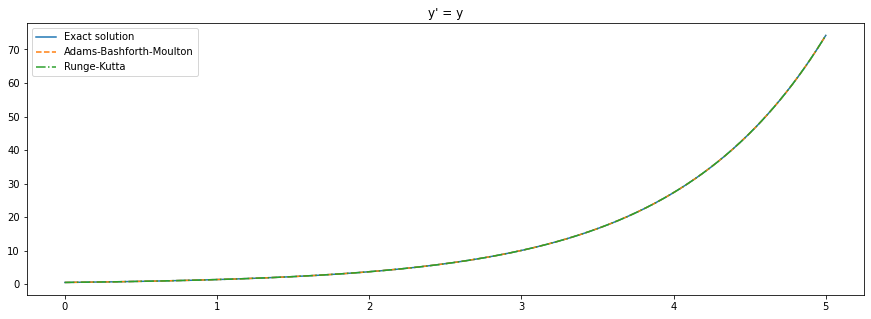

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xSpace, sol1, '-', label='Exact solution')
ax.plot(xSpace, y11, '--', label='Adams-Bashforth-Moulton')
ax.plot(xSpace, y1, '-.', label='Runge-Kutta')
leg = ax.legend()
plt.title("y' = y")
fig.show()

C:\Users\79511\AppData\Local\Temp\ipykernel_13564\754153375.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\79511\AppData\Local\Temp\ipykernel_13564\754153375.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\79511\AppData\Local\Temp\ipykernel_13564\754153375.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


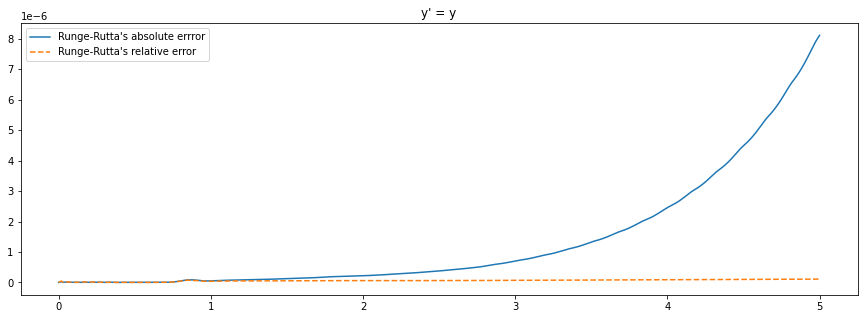

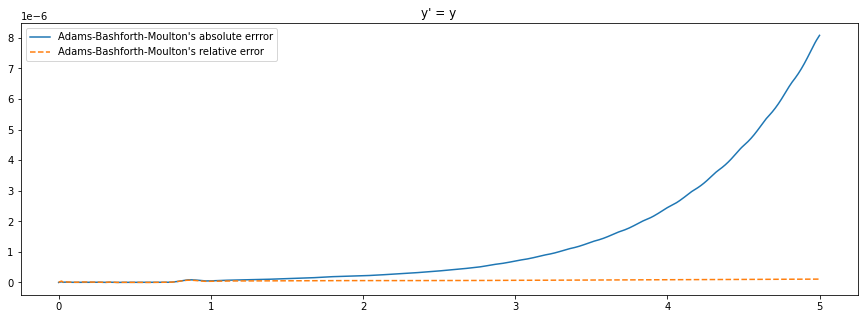

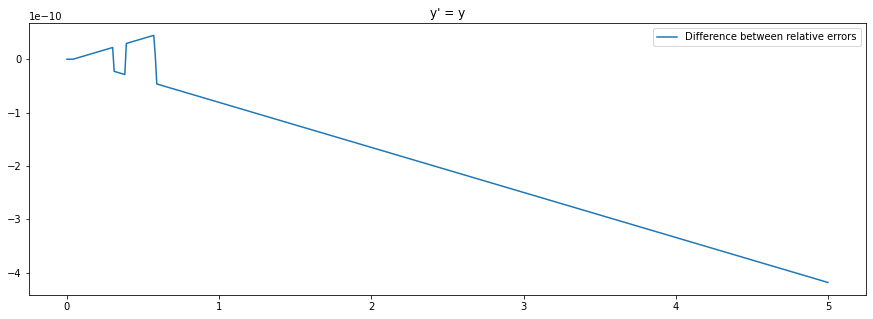

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xSpace, absdif1_rk, '-', label="Runge-Rutta's absolute errror")
ax.plot(xSpace, reldif1_rk, '--', label="Runge-Rutta's relative error")
leg = ax.legend()
plt.title("y' = y")
fig.show()
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xSpace, absdif1_bm, '-', label="Adams-Bashforth-Moulton's absolute errror")
ax.plot(xSpace, reldif1_bm, '--', label="Adams-Bashforth-Moulton's relative error")
leg = ax.legend()
plt.title("y' = y")
fig.show()
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xSpace, np.array(reldif1_bm)-np.array(reldif1_rk), '-', label="Difference between relative errors")
leg = ax.legend()
plt.title("y' = y")
fig.show()

C:\Users\79511\AppData\Local\Temp\ipykernel_13564\1059916247.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


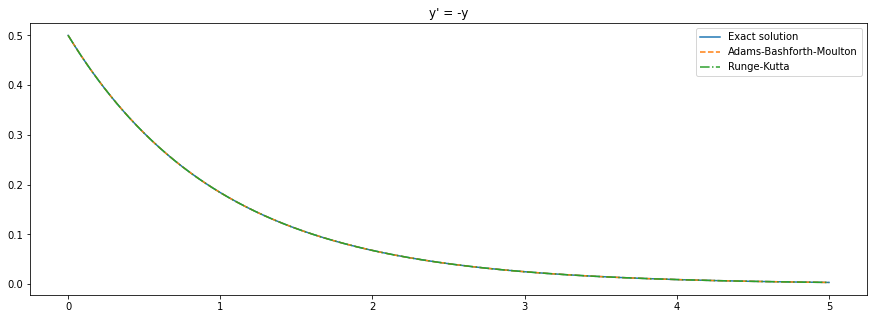

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xSpace, sol2, '-', label='Exact solution')
ax.plot(xSpace, y22, '--', label='Adams-Bashforth-Moulton')
ax.plot(xSpace, y2, '-.', label='Runge-Kutta')
leg = ax.legend()
plt.title("y' = -y")
fig.show()

C:\Users\79511\AppData\Local\Temp\ipykernel_13564\708766220.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\79511\AppData\Local\Temp\ipykernel_13564\708766220.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\79511\AppData\Local\Temp\ipykernel_13564\708766220.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


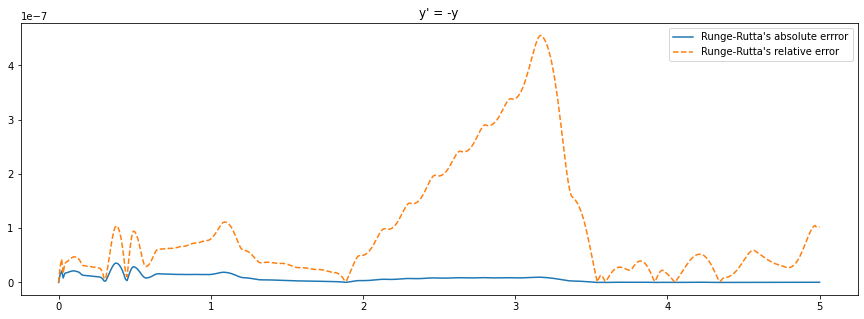

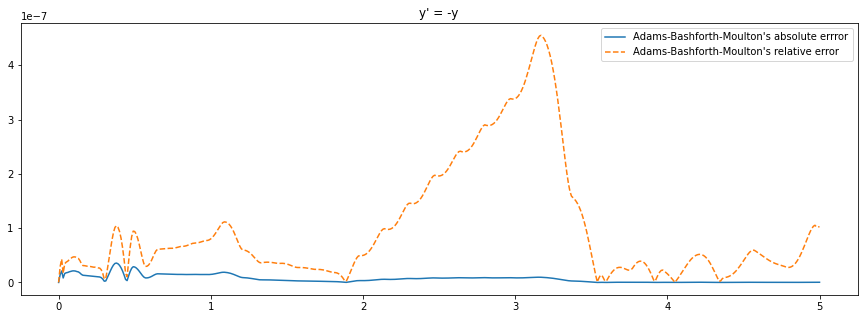

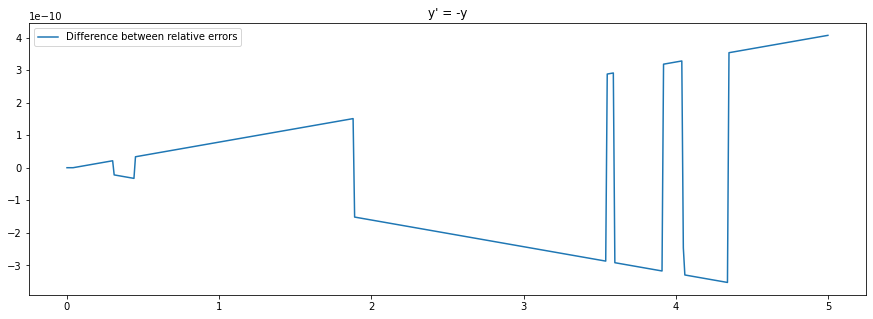

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xSpace, absdif2_rk, '-', label="Runge-Rutta's absolute errror")
ax.plot(xSpace, reldif2_rk, '--', label="Runge-Rutta's relative error")
leg = ax.legend()
plt.title("y' = -y")
fig.show()
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xSpace, absdif2_bm, '-', label="Adams-Bashforth-Moulton's absolute errror")
ax.plot(xSpace, reldif2_bm, '--', label="Adams-Bashforth-Moulton's relative error")
leg = ax.legend()
plt.title("y' = -y")
fig.show()
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xSpace, np.array(reldif2_bm)-np.array(reldif2_rk), '-', label="Difference between relative errors")
leg = ax.legend()
plt.title("y' = -y")
fig.show()